# Конспект по машинному обучению для подготовки к собеседованиям
Уровень: **Intern DS / ML**

---

## 1. Основные понятия
### 1.1. Задача обучения с учителем

Пусть дано множество $X$ и множество $Y$, и существует целевая функция $y^* = X \rightarrow Y$, значения которой $y_i = y^*(x_i), y_i \in Y, x_i \in X$ известны только на конечном подмножестве $ (x_1, x_2, ..., x_i) \in X$. Совокупность объектов $X^i = (x_1, x_2, ..., x_i) \in X$ называется выборкой.

Задача обучения с учителем заключается в том, чтобы по выборке $X^l$ восстановить зависимость $y^*$, то есть построить решающую функцию $a: X \rightarrow Y$ , которая приближала бы целевую функцию, причём
не только на объектах обучающей выборки, но и на всём множестве $X$.

Неформально это можно понимать так:

У нас есть некая неизвестная функция (таргет), и мы знаем ее значения только на ограниченном количестве входных данных. Задача обучения с учителем заключается в том, найти такую функцию, которая бы приближала максимально точно таргет на всем множестве входных данных.

---

### 1.2. Объекты и признаки

Признаком $f$ объекта $x$  называется отображение $f: X \rightarrow D_f$, где $D_f$ - множество допустимых значений признака. То есть признак - результат измерения некоторой характеристики объекта.

В зависимости от природы множества $D_f$ признаки делятся на несколько типов:
- Если $D_f = \{0, 1\}$, то $f$ бинарный признак
- Если $D_f$ это конечное множество, то $f$ - номинальный признак
- Если $D_f$ это конечное упорядоченное множество, то $f$ - порядковый признак
- Если $D_f = R$, то $f$ - количественный признак

---

### 1.3. Основные типы задач обучения с учителем

В зависимости от природы множества $Y$ задачи обучения с учителем делятся на следующие типы:

- Если множество $Y = \{1, 2, ..., M\}$, то задача называется задачей классификации на $M$ непересекающихся классов
- Если $Y = \{0, 1\}^M$ - задача классификации на $M$ пересекающихся классов
- Если $Y = R$ - задача регрессии

---

### 1.4. Функция потерь и функционал качества

Функция потерь, она же loss function, это неотрицательная функция $L(a, x)$, характеризующая величину ошибки решающей функции $a$, приближающей целевую функцию $y^*$ на объекте $x$. Если $L(a, x) = 0$, то ответ $a(x)$ называется корректным.

Функционалом качества или эмпирическим риском называется среднее арифметическое функции потерь на выборке $X^l$: $$Q(a, X^l) = \frac{1}{l}\sum_{i=0}^{i=l}{L(a, x_i)}$$

Истинным риском назвается математическое ожидание функции потерь на всем множесве $X$.

---

### 1.5 Понятие модели

Моделью называется параметрическое семейство отображений $A = \{a(x, \theta) | \theta \in \Theta\}$, где $a: X × \Theta \rightarrow Y$ некоторая фиксированная функция, $\Theta$ множество допустимых значений параметра $\theta$, называемое пространством параметров или пространством поиска.

Неформально это можно понимать так:

Модель это множество функций одинакового типа, но отличающихся каким-то параметром. Например множество линейных функций вида $y = ax + b$. Параметрами здесь являются $a$ и $b$, а моделью все возможные линейные функции. То есть можно можно записать данную модель так:
$A = \{a(x, (a, b)) | a \in R, b \in R \}$. $\theta$ - пара чисел $(a, b)$, $\Theta$ - множество всех возможных значений пары чисел $(a, b)$.

---

### 1.6 Понятие обучения

Обучением модели называется процесс подбора параметра $\theta$ функции $a$, принадлежащей модели $A$, по выборке $X^l$. 

Методом обучения называется отображение $\mu = (X × Y)^l \rightarrow A$, которое произвольной конечной выборке $X^l$ ставит в соответствие функцию $a \in A$.

Классический метод обучения, называемый минимизацией эмпирического риска, empirical risk minimization ERM, заключается в том, чтобы найти в заданной модели $A$ функцию $a$, доставляющую минимальное значение функционалу качества на заданной обучающей выборке $X^l$: $$\hat\theta = argmin_{a \in A}Q(a, X^l)$$

Неформально говоря:

Мы предполагаем, что целевая функция $y^*$ принадлежит некоторому классу функций (модели), но конкретные параметры этой функции нам неизвестны. Обучение — это процесс выбора параметров модели по выборке так, чтобы функция с этими параметрами минимизировала ошибку на данных. Полученная функция и становится решающей функцией $a$.

Например, мы предполагаем что таргет это линейная функция, то есть принадлежит линейной модели и имеет вид $y^*= ax+b$. Обучением будет подбор параметром $(a, b)$ по выборке так, чтобы минимизировать ошибку.

---

### 1.7 Проблемы обучения - underfitting и overfitting

Зачастую при обучении модели возникают две основные проблемы:

- Недообучиение (underfitting) - модель слишком простая и не способна уловить зависимость в данных.
В результате ошибки как на обучающей выборке, так и на новых данных остаются большими.
- Переобучение (overfitting) — модель слишком сложная и запоминает все детали обучающей выборки, включая шум.
В результате ошибка на обучающих данных низкая, но на новых данных значительно выше.

Хорошая модель это та, которая улавливает закономерности и не запоминает шум.

---

### 1.8 Проблемы обучения - bias-variance tradeoff

Для того чтобы модель не переобучалась, но и не недообучалась необходимо найти баланс в сложности модели. Такой баланс называют bias-variance tradeoff. 

- bias (смещение) - систематическая ошибка модели
- variance (разброс) - чувствительность модели к шуму в данных 

Если модель слишком простая, у неё высокий bias и низкий variance.
Если модель слишком сложная, у неё низкий bias, но высокий variance.

Пример: пусть целевая функция квадратичная.

- Линейная модель будет слишком простой: её предсказания систематически ошибочны (высокий bias), но она меньше реагирует на шум (низкий variance).
- Модель с кубической функцией будет слишком гибкой: она может запоминать шум и детали обучающей выборки (высокий variance), хотя bias будет низким.

---

### 1.9 Регуляризация

Регуляризация - это способ ограничить сложность модели, чтобы уменьшить переобучение. В классическом ERM добавляется штраф за слишком большие или слишком сложные параметры модели:
$$\hat\theta = argmin_{a \in A}[Q(a, X^l) + \lambda\Omega(\theta)]$$
- $Q(a, X^l)$ - эмпирический риск
- $\Omega$ - функция регуляризации
- $\lambda$ - коэффициент регуляризации, задающий степень ограничения

Самые популярные виды регуляризации:
- L2 (Ridge): уменьшает все веса, стабилизирует модель
- L1 (Lasso): выполняет отбор признаков, обнуляя некоторые веса

## 2. Задача регрессия

Регрессия - это задача обучения с учителем, где целевые значения $Y \in R$.
Цель - построить функцию $a(x)$ которая приближает значения целевой функции $y^∗$на новых данных.

Например: предсказание цены, температуры, дохода.

---

### 2.1 Линейная регрессия

### 2.1.1 Модель

Линейная регрессия это модель вида: $$f(x) = w^T x + b$$
Где:
- $x$ - вектор признаков
- $w$ — вектор весов
- $b$ — смещение

---

### 2.1.2 Функции потерь

#### Среднеквадратичная ошибка (MSE, Mean Squared Error)

$$\text{MSE} = \frac{1}{l} \sum_{i=1}^{l} (y_i - a(x_i))^2$$

Особенности: сильно штрафует большие выбросы

#### Корень из среднеквадратичной ошибки (RMSE, Root Mean Squared Error)

$$\text{RMSE} = \sqrt{\frac{1}{l} \sum_{i=1}^{l} (y_i - a(x_i))^2} = \sqrt{\text{MSE}}$$

Особенности: удобно интерпретировать, так как единицы совпадают с исходными данными.  

#### Средняя абсолютная ошибка (MAE, Mean Absolute Error)
$$\text{MAE} = \frac{1}{l} \sum_{i=1}^{l} |y_i - a(x_i)|$$
Особенности: менее чувствительна к выбросам, чем MSE. 

#### MAPE (Mean Absolute Percentage Error)
$$\text{MAPE} = \frac{100\%}{l} \sum_{i=1}^{l} \frac{|y_i - a(x_i)|}{|y_i|}, y_i \neq 0$$
Особенности: полезна для бизнес-прогнозов, но не работает, если $y_i = 0$.  

#### Коэффициент детерминации
Коэффициент, показывающий долю вариации целевой переменной, объясненную моделью.  
$$R^2 = 1 - \frac{\sum_{i=1}^{l} (y_i - a(x_i))^2}{\sum_{i=1}^{l} (y_i - \bar{y})^2}$$

где $\bar{y}$ — среднее по выборке.
Особенности: 
- $R^2 = 1$ — идеальное предсказание  
- $R^2 = 0$ — модель не лучше среднего  
- $R^2 < 0$ — модель хуже простого среднего 

---

### 2.1.3 Обучение
 
Обучение линейной регрессии сводится к подбору параметров $w$ и $b$, минимизирующих функцию потерь (обычно MSE) на обучающей выборке:

$$
\hat{w}, \hat{b} = \arg\min_{w, b} \frac{1}{l} \sum_{i=1}^{l} (y_i - (w^T x_i + b))^2
$$

Методы обучения:
- Аналитическое решение (метод нормальных уравнений): подходит для небольшого числа признаков, вычисляет точное решение напрямую.  
- Градиентный спуск: подходит для больших наборов данных и признаков, обновляет параметры итерационно, двигаясь по направлению уменьшения ошибки.  
- Стохастический/мини-батч градиентный спуск: вариант градиентного спуска, который ускоряет обучение на больших данных.

---

#### 2.1.4 Регуляризация 

- Ridge (L2-регуляризация):
$$
\hat{w}, \hat{b} = \arg\min_{w, b} \frac{1}{l} \sum_{i=1}^{l} (y_i - (w^T x_i + b))^2 + \lambda \sum_{j=1}^{n} w_j^2
$$

- Lasso (L1-регуляризация):
$$
\hat{w}, \hat{b} = \arg\min_{w, b} \frac{1}{l} \sum_{i=1}^{l} (y_i - (w^T x_i + b))^2 + \lambda \sum_{j=1}^{n} |w_j|
$$

Интуитивно: 
- L2 (Ridge) слегка уменьшает все веса, делая модель более «гладкой» и устойчивой к шуму.  
- L1 (Lasso) может обнулять некоторые веса, фактически отбирая только важные признаки, что упрощает модель.  



### 2.1.5 Пример линейной регрессии

#### Загрузка датасета

Чтение данных из CSV, где `x` — признак, `y` — целевая переменная.

In [ ]:
import pandas as pd

data = pd.read_csv("linear_regression.csv")

X = data[["x"]].values
Y = data["y"].values

#### График исходных данных

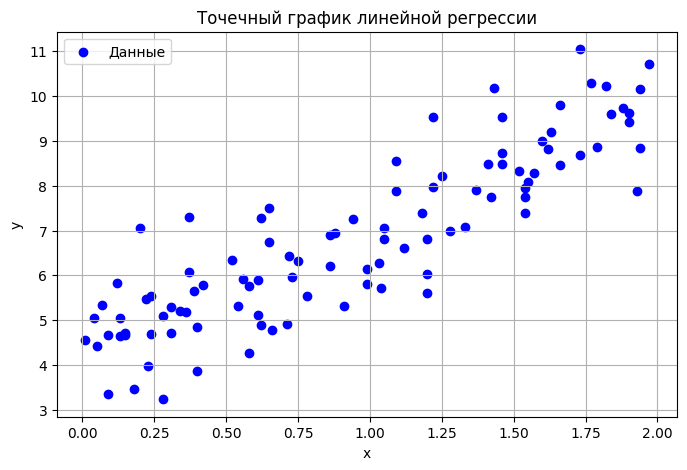

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue', label='Данные')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Данные для обучения линейной регрессии')
plt.legend()
plt.grid(True)
plt.show()

#### Разделение датасета на тестовую и тренировочные выборки

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#### Создание и обучение модели

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

w = model.coef_[0] 
b = model.intercept_

print(f"w = {w:.3f}, b = {b:.3f}")

w = 2.685, b = 4.346


#### Предсказание и расчет метрик

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Y_test_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_test_pred)
mae = mean_absolute_error(Y_test, Y_test_pred)
r2 = r2_score(Y_test, Y_test_pred)

print(f"MSE  = {mse:.3f}")
print(f"MAE  = {mae:.3f}")
print(f"R²   = {r2:.3f}")

MSE  = 0.878
MAE  = 0.660
R²   = 0.807


Модель объясняет 80.7% дисперсии данных

#### Визуализация линии регрессии

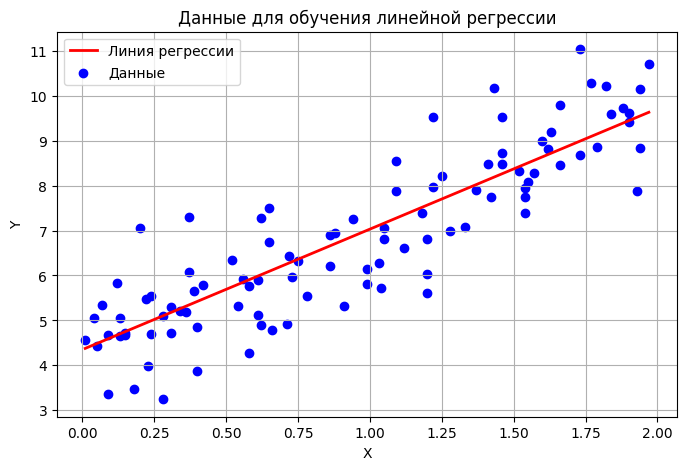

In [22]:
import numpy as np

plt.figure(figsize=(8, 5))
x_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='red', linewidth=2, label='Линия регрессии')
plt.scatter(X, Y, color='blue', label='Данные')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Данные для обучения линейной регрессии')
plt.legend()
plt.grid(True)
plt.show()